<a href="https://colab.research.google.com/github/adibhosn/Data_analysis_lab/blob/main/MatPlot_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib


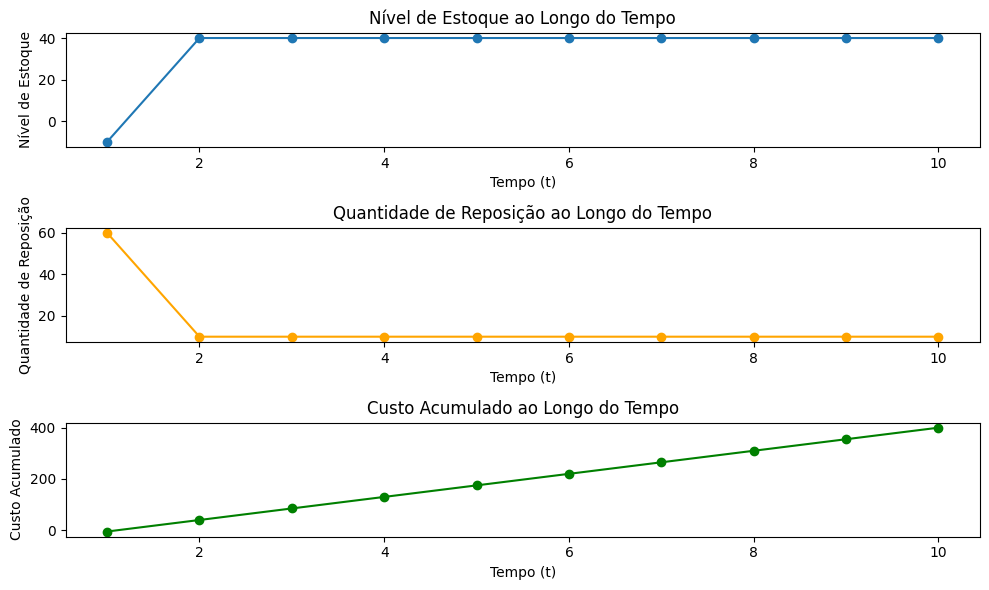

In [ ]:
import matplotlib.pyplot as plt

# Parâmetros do modelo
EM = 50  # Estoque mínimo desejado
LT = 2   # Lead time
CR = 5   # Custo de reabastecimento por pedido
CH = 1   # Custo de manutenção de estoque por unidade por unidade de tempo
T = 10   # Número de períodos

def calcular_controle_estoque():
    S = [0] * (T + 1)  # Nível de estoque
    R = [0] * (T + 1)  # Reposição
    custo_total = 0
    custo_acumulado = []

    for t in range(1, T + 1):
        D_t = 10  # Substitua isso pelos valores reais de demanda ou ajuste conforme necessário
        S[t] = S[t - 1] + R[t - 1] - D_t
        if S[t] < EM:
            R[t] = EM - S[t]
            custo_total += CR
        else:
            R[t] = 0
        custo_total += CH * S[t]
        custo_acumulado.append(custo_total)

    return S[1:], R[1:], custo_acumulado

def plotar_grafico(niveis_estoque, reposicoes, custo_acumulado):
    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(range(1, T + 1), niveis_estoque, marker='o')
    plt.title('Nível de Estoque ao Longo do Tempo')
    plt.xlabel('Tempo (t)')
    plt.ylabel('Nível de Estoque')

    plt.subplot(3, 1, 2)
    plt.plot(range(1, T + 1), reposicoes, marker='o', color='orange')
    plt.title('Quantidade de Reposição ao Longo do Tempo')
    plt.xlabel('Tempo (t)')
    plt.ylabel('Quantidade de Reposição')

    plt.subplot(3, 1, 3)
    plt.plot(range(1, T + 1), custo_acumulado, marker='o', color='green')
    plt.title('Custo Acumulado ao Longo do Tempo')
    plt.xlabel('Tempo (t)')
    plt.ylabel('Custo Acumulado')

    plt.tight_layout()
    plt.show()

def main():
    niveis_estoque, reposicoes, custo_acumulado = calcular_controle_estoque()
    plotar_grafico(niveis_estoque, reposicoes, custo_acumulado)

if __name__ == '__main__':
    main()
